In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
hospital = pd.read_csv("Hospitalisation details.csv")
medical = pd.read_csv("Medical Examinations.csv")
customer = pd.read_excel("Names.xlsx")

In [84]:
hospital.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [85]:
hospital.shape

(2343, 9)

In [86]:
hospital.describe()

,date,children,charges
count,2343.000000,2343.000000,2343.000000
mean,15.554844,1.026035,13559.067870
std,8.721194,1.233847,11922.658415
min,1.000000,0.000000,563.840000
25%,8.000000,0.000000,5084.010000
50%,15.000000,0.000000,9634.540000
75%,23.000000,2.000000,17029.675000
max,30.000000,5.000000,63770.430000


In [87]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


In [88]:
medical.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [89]:
medical.shape

(2335, 8)

In [90]:
medical.describe()

,BMI,HBA1C
count,2335.000000,2335.000000
mean,30.972649,6.578998
std,8.742095,2.228731
min,15.010000,4.000000
25%,24.600000,4.900000
50%,30.400000,5.810000
75%,36.300000,7.955000
max,55.050000,12.000000


In [91]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


In [92]:
customer.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [93]:
customer.shape

(2335, 2)

In [94]:
customer.describe()

,Customer ID,name
count,2335,2335
unique,2335,2335
top,Id1,"Hawks, Ms. Kelly"
freq,1,1


In [95]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


## 1. Collate the files so that all the information is in one place

In [96]:
df = pd.merge(pd.merge(hospital,medical,on='Customer ID'),customer,on='Customer ID')

In [97]:
df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"


In [98]:
df.shape

(2335, 17)

In [99]:
df.describe()

,date,children,charges,BMI,HBA1C
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,15.563597,1.025696,13529.918034,30.972649,6.578998
std,8.720508,1.234754,11898.654299,8.742095,2.228731
min,1.000000,0.000000,563.840000,15.010000,4.000000
25%,8.000000,0.000000,5084.010000,24.600000,4.900000
50%,15.000000,0.000000,9630.910000,30.400000,5.810000
75%,23.000000,2.000000,16912.295000,36.300000,7.955000
max,30.000000,5.000000,63770.430000,55.050000,12.000000


## 2. Check for missing values in the dataset

In [100]:
df.isna().sum().sum()

0

* There are no missing values in the dataset

## 3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information


In [101]:
trivial= df[df == "?"].count(axis=1).sum()


In [102]:
trivial

11

In [103]:
trivial.shape

()

In [104]:
total= df.shape[0]
total

2335

In [105]:
percentage = (trivial / total_rows) * 100


In [106]:
percentage

0.47109207708779444

* 0.47109 % of rows contain the trivial values.

In [107]:
print("Percentage of trivial rows: {:.2f}%".format(percentage))


Percentage of trivial rows: 0.47%


In [108]:
df = df[df != "?"].dropna()


In [109]:
df.shape

(2325, 17)

## 4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

In [110]:
df_cat = df.select_dtypes(exclude='number')


In [111]:
df_cat.columns


Index(['Customer ID', 'year', 'month', 'Hospital tier', 'City tier',
       'State ID', 'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name'],
      dtype='object')

In [112]:
df['Heart Issues'].value_counts()


Heart Issues
No     1405
yes     920
Name: count, dtype: int64

In [113]:
df['Any Transplants'].value_counts()

Any Transplants
No     2183
yes     142
Name: count, dtype: int64

In [114]:
df['Cancer history'].value_counts()

Cancer history
No     1934
Yes     391
Name: count, dtype: int64

In [115]:
df['smoker'].value_counts()

smoker
No     1839
yes     486
Name: count, dtype: int64

In [116]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [117]:
df["Heart Issues"]=le.fit_transform(df["Heart Issues"])
df["Any Transplants"]=le.fit_transform(df["Any Transplants"])
df["Cancer history"]=le.fit_transform(df["Cancer history"])
df["smoker"]=le.fit_transform(df["smoker"])

In [118]:
df["Heart Issues"].value_counts()


Heart Issues
0    1405
1     920
Name: count, dtype: int64

 * Hospital tier and city tier are ordinal categorical variables

In [119]:
def fun(val):
    return int(val.replace("tier", "").replace(" ", "").replace("-", ""))


In [120]:
df['Hospital tier'] = df['Hospital tier'].map(fun)

In [121]:
df['City tier'] = df['City tier'].map(fun)

In [122]:
df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,17.580,4.51,0,0,0,1,0,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,17.600,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,16.470,6.35,0,0,1,1,0,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,17.700,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,22.340,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,1962,Aug,4,0,52590.83,1,3,R1011,32.800,6.59,0,0,0,No major surgery,1,"Baker, Mr. Russell B."
2330,Id5,1989,Jun,19,0,55135.40,1,2,R1012,35.530,5.45,0,0,0,No major surgery,1,"Kadala, Ms. Kristyn"
2331,Id4,1991,Jun,6,1,58571.07,1,3,R1024,38.095,6.05,0,0,0,No major surgery,1,"Osborne, Ms. Kelsey"
2333,Id2,1977,Jun,8,0,62592.87,2,3,R1013,30.360,5.77,0,0,0,No major surgery,1,"Lehner, Mr. Matthew D"


In [123]:
df['Hospital tier'].value_counts()


Hospital tier
2    1334
3     691
1     300
Name: count, dtype: int64

## 5.The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.

In [124]:
df['State ID'].value_counts()


State ID
R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: count, dtype: int64

In [125]:
Dummies = pd.get_dummies(df["State ID"], prefix= "State_ID")
Dummies

,State_ID_R1011,State_ID_R1012,State_ID_R1013,State_ID_R1014,State_ID_R1015,State_ID_R1016,State_ID_R1017,State_ID_R1018,State_ID_R1019,State_ID_R1020,State_ID_R1021,State_ID_R1022,State_ID_R1023,State_ID_R1024,State_ID_R1025,State_ID_R1026
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2330,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2331,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2333,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
Dummy = Dummies[['State_ID_R1011','State_ID_R1012', 'State_ID_R1013']]
Dummy

,State_ID_R1011,State_ID_R1012,State_ID_R1013
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
2329,True,False,False
2330,False,True,False
2331,False,False,False
2333,False,False,True


In [127]:
df = pd.concat([df,Dummy],axis=1)

In [128]:
df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_ID_R1011,State_ID_R1012,State_ID_R1013
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,17.580,4.51,0,0,0,1,0,"German, Mr. Aaron K",False,False,True
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,17.600,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",False,False,True
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,16.470,6.35,0,0,1,1,0,"Albano, Ms. Julie",False,False,True
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,17.700,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",False,False,True
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,22.340,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,1962,Aug,4,0,52590.83,1,3,R1011,32.800,6.59,0,0,0,No major surgery,1,"Baker, Mr. Russell B.",True,False,False
2330,Id5,1989,Jun,19,0,55135.40,1,2,R1012,35.530,5.45,0,0,0,No major surgery,1,"Kadala, Ms. Kristyn",False,True,False
2331,Id4,1991,Jun,6,1,58571.07,1,3,R1024,38.095,6.05,0,0,0,No major surgery,1,"Osborne, Ms. Kelsey",False,False,False
2333,Id2,1977,Jun,8,0,62592.87,2,3,R1013,30.360,5.77,0,0,0,No major surgery,1,"Lehner, Mr. Matthew D",False,False,True


## 6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable

In [129]:
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace('No major surgery',0)

In [130]:
df['NumberOfMajorSurgeries'].value_counts()

NumberOfMajorSurgeries
0    1070
1     961
2     272
3      22
Name: count, dtype: int64

## 7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.

In [131]:
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
df['year']

0       1992
1       1992
2       1993
3       1992
4       1998
        ... 
2329    1962
2330    1989
2331    1991
2333    1977
2334    1968
Name: year, Length: 2325, dtype: int32

In [132]:
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month']

0        7
1       11
2        6
3        9
4        7
        ..
2329     8
2330     6
2331     6
2333     6
2334    10
Name: month, Length: 2325, dtype: int32

In [133]:
df['DateInt'] = df['year'].astype(str) + df['month'].astype(str).str.zfill(2) + df['date'].astype(str).str.zfill(2)

In [134]:
df['DOB'] = pd.to_datetime(df.DateInt, format='%Y%m%d')

In [135]:
df.drop(['DateInt'], inplace=True, axis=1)

In [136]:
import datetime as dt
current_date = dt.datetime.now()

In [137]:
df['Age'] = (((current_date-df.DOB).dt.days)/365).astype(int)

In [138]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_ID_R1011,State_ID_R1012,State_ID_R1013,DOB,Age
0,Id2335,1992,7,9,0,563.84,2,3,R1013,17.58,...,0,0,1,0,"German, Mr. Aaron K",False,False,True,1992-07-09,30
1,Id2334,1992,11,30,0,570.62,2,1,R1013,17.60,...,0,0,1,0,"Rosendahl, Mr. Evan P",False,False,True,1992-11-30,30
2,Id2333,1993,6,30,0,600.00,2,1,R1013,16.47,...,0,1,1,0,"Albano, Ms. Julie",False,False,True,1993-06-30,29
3,Id2332,1992,9,13,0,604.54,3,3,R1013,17.70,...,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",False,False,True,1992-09-13,30
4,Id2331,1998,7,27,0,637.26,3,3,R1013,22.34,...,0,0,1,0,"Brietzke, Mr. Jordan",False,False,True,1998-07-27,24


In [139]:
df.tail()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_ID_R1011,State_ID_R1012,State_ID_R1013,DOB,Age
2329,Id6,1962,8,4,0,52590.83,1,3,R1011,32.800,...,0,0,0,1,"Baker, Mr. Russell B.",True,False,False,1962-08-04,60
2330,Id5,1989,6,19,0,55135.40,1,2,R1012,35.530,...,0,0,0,1,"Kadala, Ms. Kristyn",False,True,False,1989-06-19,33
2331,Id4,1991,6,6,1,58571.07,1,3,R1024,38.095,...,0,0,0,1,"Osborne, Ms. Kelsey",False,False,False,1991-06-06,31
2333,Id2,1977,6,8,0,62592.87,2,3,R1013,30.360,...,0,0,0,1,"Lehner, Mr. Matthew D",False,False,True,1977-06-08,45
2334,Id1,1968,10,12,0,63770.43,1,3,R1013,47.410,...,0,0,0,1,"Hawks, Ms. Kelly",False,False,True,1968-10-12,54


In [140]:
df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,State_ID_R1011,State_ID_R1012,State_ID_R1013,DOB,Age
0,Id2335,1992,7,9,0,563.84,2,3,R1013,17.580,...,0,0,1,0,"German, Mr. Aaron K",False,False,True,1992-07-09,30
1,Id2334,1992,11,30,0,570.62,2,1,R1013,17.600,...,0,0,1,0,"Rosendahl, Mr. Evan P",False,False,True,1992-11-30,30
2,Id2333,1993,6,30,0,600.00,2,1,R1013,16.470,...,0,1,1,0,"Albano, Ms. Julie",False,False,True,1993-06-30,29
3,Id2332,1992,9,13,0,604.54,3,3,R1013,17.700,...,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",False,False,True,1992-09-13,30
4,Id2331,1998,7,27,0,637.26,3,3,R1013,22.340,...,0,0,1,0,"Brietzke, Mr. Jordan",False,False,True,1998-07-27,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,1962,8,4,0,52590.83,1,3,R1011,32.800,...,0,0,0,1,"Baker, Mr. Russell B.",True,False,False,1962-08-04,60
2330,Id5,1989,6,19,0,55135.40,1,2,R1012,35.530,...,0,0,0,1,"Kadala, Ms. Kristyn",False,True,False,1989-06-19,33
2331,Id4,1991,6,6,1,58571.07,1,3,R1024,38.095,...,0,0,0,1,"Osborne, Ms. Kelsey",False,False,False,1991-06-06,31
2333,Id2,1977,6,8,0,62592.87,2,3,R1013,30.360,...,0,0,0,1,"Lehner, Mr. Matthew D",False,False,True,1977-06-08,45


## 8. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

In [141]:
def gen(x):
    if 'Ms.' in x:
        return 0
    else:
        return 1

In [142]:
df['Gender'] = df['name'].map(gen)

In [143]:
df['Gender']

0       1
1       1
2       0
3       1
4       1
       ..
2329    1
2330    0
2331    0
2333    1
2334    0
Name: Gender, Length: 2325, dtype: int64

## 9. You should also visualize the distribution of costs using a histogram, box and whisker plot,and swarm plot.


<Axes: xlabel='charges', ylabel='Count'>

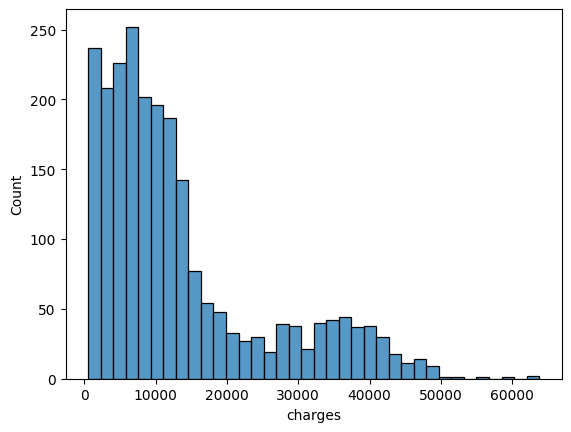

In [144]:
# Histogram 
sns.histplot(df['charges'])

<Axes: >

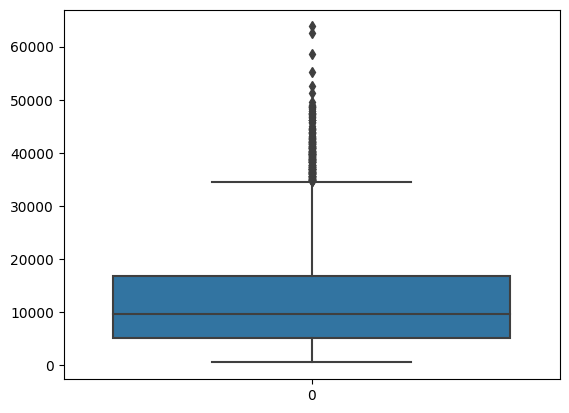

In [145]:
# box and whisker plot
sns.boxplot(df['charges'])

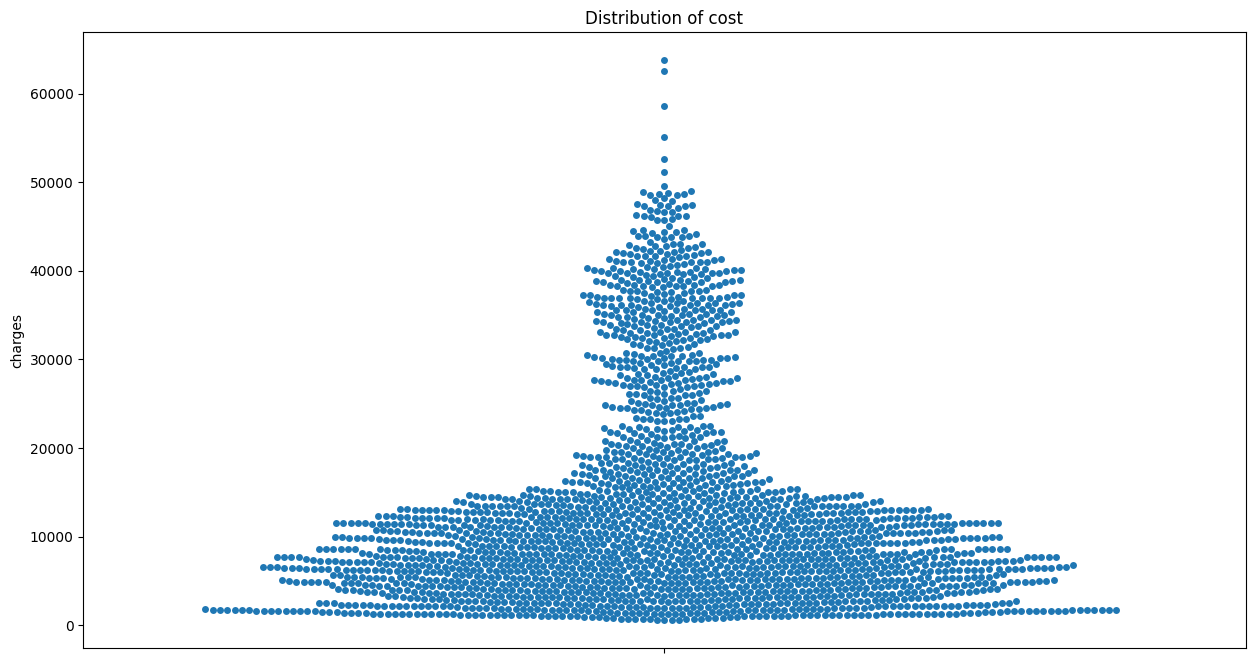

In [148]:
# Swarm Plot
plt.figure(figsize=(15,8))
sns.swarmplot(df['charges'])
plt.title('Distribution of cost')
plt.show()

## 10. State how the distribution is different across gender and tiers of hospitals

<Axes: xlabel='Hospital tier', ylabel='count'>

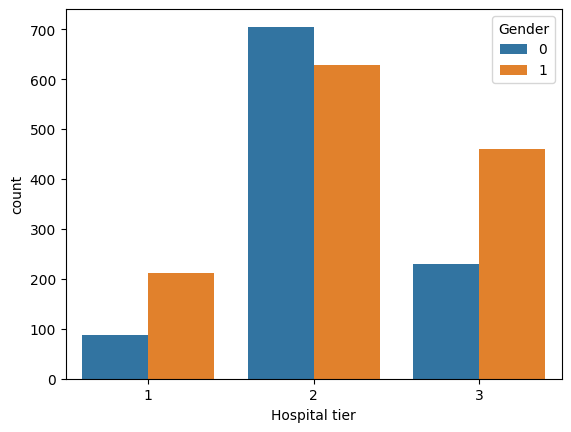

In [147]:
sns.countplot(data = df,x = 'Hospital tier', hue = 'Gender')

* In above plot 0 indicates female and 1 indicates male.
* In Hospital tier 1 and 3 we can see that, the count of females are less than compared to the tier 2.

## 11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

In [149]:
df[df['Hospital tier']==1].charges.median()

32097.434999999998

In [150]:
df[df['Hospital tier']==2].charges.median()

7168.76

In [151]:
df[df['Hospital tier']==3].charges.median()

10676.83

In [153]:
!pip install plotly


     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
      --------------------------------------- 0.2/15.3 MB 11.5 MB/s eta 0:00:02
     - -------------------------------------- 0.4/15.3 MB 4.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/15.3 MB 5.7 MB/s eta 0:00:03
     --- ------------------------------------ 1.4/15.3 MB 7.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/15.3 MB 8.2 MB/s eta 0:00:02
     ----- ---------------------------------- 2.1/15.3 MB 7.4 MB/s eta 0:00:02
     ----- ---------------------------------- 2.1/15.3 MB 7.4 MB/s eta 0:00:02
     ------- -------------------------------- 3.0/15.3 MB 6.9 MB/s eta 0:00:02
     --------- ------------------------------ 3.6/15.3 MB 7.4 MB/s eta 0:00:02
     ---------- ----------------------------- 4.2/15.3 MB 7.6 MB/s eta 0:00:02
     ---------- ----------------------------- 4.2/15.3 MB 7.1 MB/s eta 0:00:02
     ------------ --------------------------- 4.8/15.3 MB 

In [155]:
!pip install --upgrade plotly


In [163]:
import plotly.graph_objects as go
import pandas as pd

df1 = df1 = pd.DataFrame(dict(
    r=[32097.434999999998, 7168.76, 10676.83],
    theta=['Tier 1', 'Tier 2', 'Tier 3']
))

df2 = pd.concat([df1, df1.iloc[0]], ignore_index=True)

fig = go.Figure(data=go.Scatterpolar(
    r=df2['r'],
    theta=df2['theta'],
    fill='toself'
))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 35000])))

fig.show()

## 12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals

In [166]:
city_freq = df["City tier"].value_counts().rename_axis('City&hospital_tier').reset_index(name='city_counts')

In [167]:
hospital_freq = df["Hospital tier"].value_counts().rename_axis('City&hospital_tier').reset_index(name='hospital_counts')

In [168]:
freq_table = pd.merge(city_freq, hospital_freq, on = 'City&hospital_tier')

In [169]:
freq_table

,City&hospital_tier,city_counts,hospital_counts
0,2,807,1334
1,3,789,691
2,1,729,300


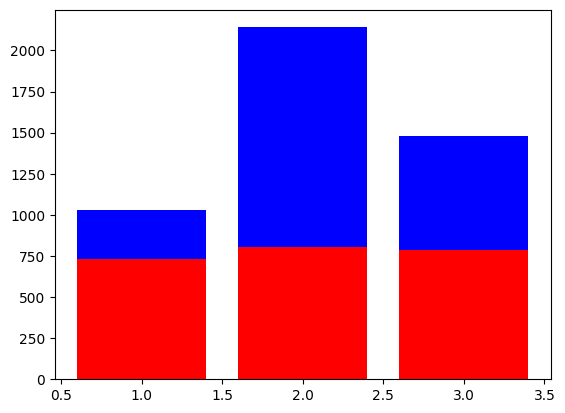

In [170]:
x = freq_table['City&hospital_tier']
y1 = freq_table['city_counts']
y2 = freq_table['hospital_counts']
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

## 13. Test the following null hypotheses:
* a. The average hospitalization costs for the three types of hospitals are not significantly different
* b. The average hospitalization costs for the three types of cities are not significantly different
* c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers
* d. Smoking and heart issues are independent

In [175]:
from scipy.stats import ttest_1samp
import scipy.stats as stats


#### a. The average hospitalization costs for the three types of hospitals are not significantly different

In [176]:
print('Null Hypothesis => Average hospitalization costs for the three types of hospitals are not significantly different.')
f_val, p_val = stats.f_oneway(df[df['Hospital tier'] == 'tier,1']['charges'],
                              df[df['Hospital tier'] == 'tier,2']['charges'],
                              df[df['Hospital tier'] == 'tier,3']['charges'])
print('P-value :',p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Null Hypothesis => Average hospitalization costs for the three types of hospitals are not significantly different.
P-value : nan
Accept null hypothesis


##### We already found the median cost of tier 1 hospitals: 32097.434999999998, median cost of tier 2 hospitals: 7168.76 and .median cost of tier 3 hospitals: 10676.83. Interpretation H0: the distributions of all samples are equal and H1: the distributions of one or more samples are not equal

In [177]:
from scipy.stats import friedmanchisquare
data1 = [32097.43]
data2 = [7168.76]
data3 = [10676.83]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=2.000, p=0.368
Probably the same distribution


#### b. The average hospitalization costs for the three types of cities are not significantly different

In [178]:
print("median cost of tier 1 city:", df[df["City tier"]==1].charges.median())
print("median cost of tier 2 city:", df[df["City tier"]==2].charges.median())
print("median cost of tier 3 city:", df[df["City tier"]==3].charges.median())

median cost of tier 1 city: 10027.15
median cost of tier 2 city: 8968.33
median cost of tier 3 city: 9880.07


In [179]:
data1 = [10027.15]
data2 = [8968.33]
data3 = [9880.07]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=2.000, p=0.368
Probably the same distribution


In [182]:
print('Null Hypothesis => Average hospitalization costs for the three types of cities are not significantly different.')
f_val, p_val = stats.f_oneway(df[df['City tier'] == 'tier,1']['charges'],
                              df[df['City tier'] == 'tier,2']['charges'],
                              df[df['City tier'] == 'tier,3']['charges'])
print('P-value :',p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Null Hypothesis => Average hospitalization costs for the three types of cities are not significantly different.
P-value : nan
Accept null hypothesis


#### c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers

In [180]:
print("median cost of smoker:", df[df["smoker"]==1].charges.median())
print("median cost of non smoker:", df[df["smoker"]==0].charges.median())

median cost of smoker: 34125.475
median cost of non smoker: 7537.16


In [186]:
from scipy.stats import kruskal
data1 = [34125.475]
data2 = [7537.16]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.000, p=0.317
Probably the same distribution


In [184]:
print('Null Hypothesis => Average hospitalization costs for smokers is not significantly different from the average cost for nonsmokers.')
t_val, p_val = stats.ttest_ind(df[df['smoker'] == 'yes']['charges'],
                              df[df['smoker'] == 'no']['charges'])
                          
print('P-value :',p_val)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Null Hypothesis => Average hospitalization costs for smokers is not significantly different from the average cost for nonsmokers.
P-value : nan
Accept null hypothesis


* Interpretation H0: the two samples are independent. H1: there is a dependency between the samples.

#### d. Smoking and heart issues are independent

In [187]:
# d. Smoking and heart issues are independent
from scipy.stats import chi2_contingency
table = [[df["Heart Issues"].value_counts()],[df["smoker"].value_counts()]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=191.145, p=0.000
Probably dependent


In [190]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['smoker'], df['Heart Issues'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'P-value = {p}')
if p < 0.05:
    print("Reject the null hypothesis, Smoking and heart issues are independent.")
else:
    print("Accept null hypothesis, Smoking and heart issues are independent.")


P-value = 0.7694797581780767
Accept null hypothesis, Smoking and heart issues are independent.


# Machine Learning


###  1.Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.

In [191]:
df.drop(["Customer ID","State ID",'name', 'year', 'month', 'date', 'DOB'], inplace=True, axis=1)

In [192]:
df.head()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State_ID_R1011,State_ID_R1012,State_ID_R1013,Age,Gender
0,0,563.84,2,3,17.58,4.51,0,0,0,1,0,False,False,True,30,1
1,0,570.62,2,1,17.60,4.39,0,0,0,1,0,False,False,True,30,1
2,0,600.00,2,1,16.47,6.35,0,0,1,1,0,False,False,True,29,0
3,0,604.54,3,3,17.70,6.28,0,0,0,1,0,False,False,True,30,1
4,0,637.26,3,3,22.34,5.57,0,0,0,1,0,False,False,True,24,1


<Axes: >

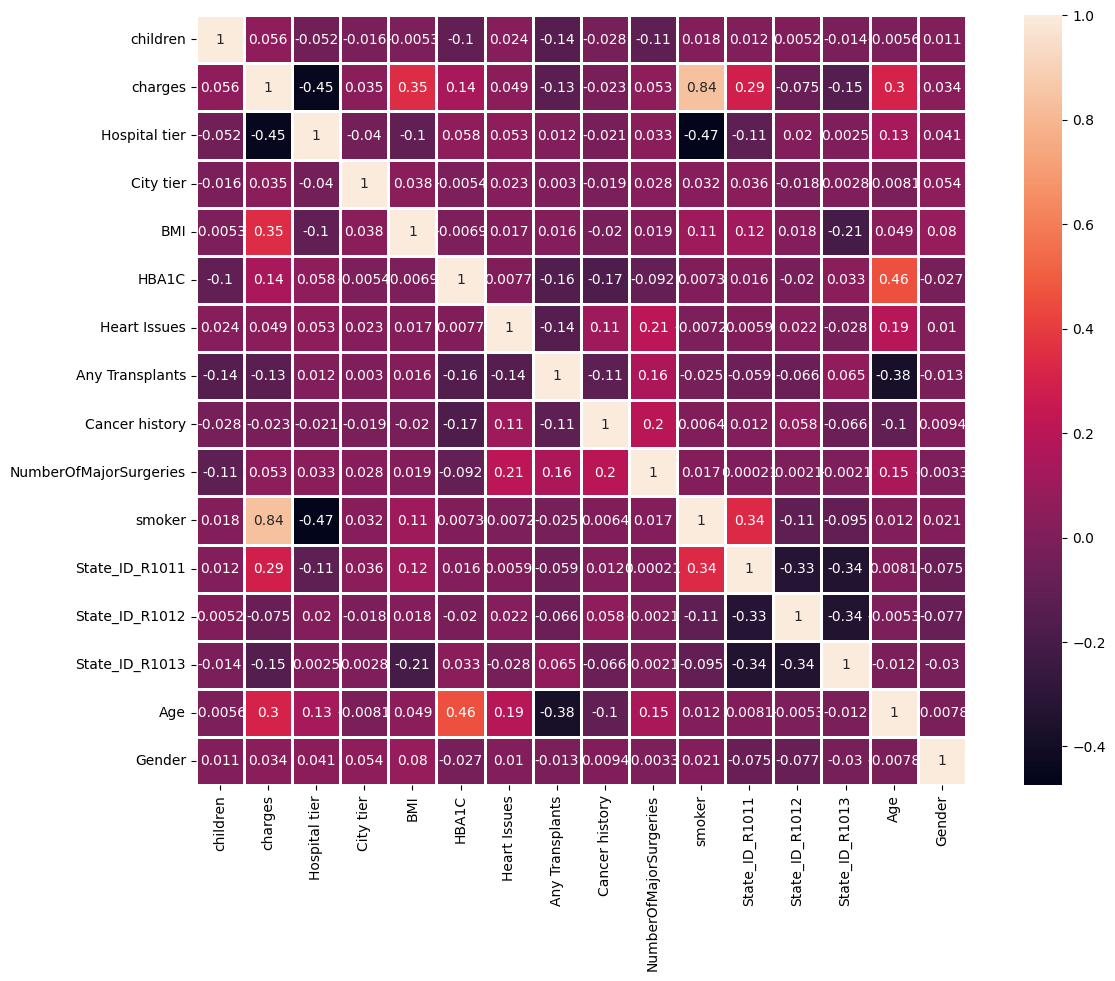

In [193]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),square=True,annot=True,linewidths=1)

### 2. Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions:
• Perform the stratified 5-fold cross-validation technique for model building and validation • Use standardization and hyperparameter tuning effectively • Use sklearn-pipelines • Use appropriate regularization techniques to address the bias-variance trade-off





* a. Create five folds in the data, and introduce a variable to identify the folds
* b. For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the remaining 20 percent is used to validate it in each iteration
* c. Develop five distinct models and five distinct validation scores (root mean squared error values)
* d. Determine the variable importance scores, and identify the redundant variables

In [194]:
from sklearn.model_selection import train_test_split

In [196]:
x = df.drop(["charges"], axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20,random_state=10)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
from sklearn.linear_model import SGDRegressor

In [197]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5,
0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,
9.0,10.0,20,50,100,500,1000],
'penalty': ['l2', 'l1', 'elasticnet']}
sgd = SGDRegressor()
# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator = sgd,
param_grid = params,
scoring = 'neg_mean_absolute_error',
cv = folds,
return_train_score = True,
verbose = 1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [198]:
model_cv.best_params_


{'alpha': 4.0, 'penalty': 'l1'}

In [200]:
sgd = SGDRegressor(alpha= 100, penalty= 'l1')


In [201]:
sgd.fit(x_train, y_train)


SGDRegressor(alpha=100, penalty='l1')

In [202]:
sgd.score(x_test, y_test)


0.8711282239533751

In [203]:
 y_pred = sgd.predict(x_test)


In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
sgd_mae = mean_absolute_error(y_test, y_pred)
sgd_mse = mean_squared_error(y_test, y_pred)
sgd_rmse = sgd_mse*(1/2.0)

In [206]:
print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)

MAE: 2681.183902514782
MSE: 18756962.940102503
RMSE: 9378481.470051251


In [207]:
importance = sgd.coef_
pd.DataFrame(importance, index = x.columns, columns=['Feature_imp'])

,Feature_imp
children,324.625902
Hospital tier,-1135.536560
City tier,0.000000
BMI,2697.227677
HBA1C,138.011477
Heart Issues,0.000000
Any Transplants,0.000000
Cancer history,0.000000
NumberOfMajorSurgeries,0.000000
smoker,8998.720349


## 3. Use random forest and extreme gradient boosting for cost prediction, share your cross validation results, and calculate the variable importance scores


In [208]:
from sklearn.ensemble import RandomForestRegressor


In [209]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [210]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [211]:
score = rf.score(x_test,y_test)
score

0.901740825808739

In [212]:
y_pred = rf.predict(x_test)

In [213]:
rf_mae = mean_absolute_error(y_test, y_pred)

In [214]:
rf_mae

1940.0160889462331

 ##### Extreme gradient boosting

In [215]:
from sklearn.ensemble import GradientBoostingRegressor

In [216]:
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 42)

In [217]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [218]:
score = gbr.score(x_test,y_test)
score

0.8650084426981199

In [219]:
y_pred = gbr.predict(x_test)

In [220]:
gbr_mae = mean_absolute_error(y_test, y_pred)
gbr_mae

2424.08578378777

* Since Mean Absolute Eroor of Random Forest is less than extreme gradient boosting, Random Forest algorithm works well. 

### 4.Case scenario: Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.

In [222]:
df.columns


Index(['children', 'charges', 'Hospital tier', 'City tier', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'State_ID_R1011', 'State_ID_R1012',
       'State_ID_R1013', 'Age', 'Gender'],
      dtype='object')

In [223]:
date = str(19881228)
date1 = pd.to_datetime(date, format = "%Y%m%d")

In [226]:
current_date = dt.datetime.now()
current_date

datetime.datetime(2023, 5, 25, 18, 55, 19, 779951)

In [227]:
age = (current_date - date1)
age

Timedelta('12566 days 18:55:19.779951')

In [228]:
age = int(12566/365)
age

34

* So the age of Christopher, Ms. Jayna is 34

In [229]:
height_m = 170/100
height_sq = height_m*height_m
BMI = 85/height_sq
np.round(BMI,2)

29.41

* BMI is 29.41

In [268]:
df.columns

Index(['children', 'Hospital tier', 'City tier', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'State_ID_R1011', 'State_ID_R1012',
       'State_ID_R1013', 'age', 'gender'],
      dtype='object')

In [270]:
list = [[2,1,1,29.41,5.8,0,0,0,0,1,1,0,0,34,0]]

In [271]:
df = pd.DataFrame(list, columns = ['children','Hospital tier', 'City tier', 'BMI', 'HBA1C','Heart Issues', 'Any Transplants', 
                              'Cancer history','NumberOfMajorSurgeries', 'smoker', 'State_ID_R1011', 'State_ID_R1012',
                              'State_ID_R1013', 'age', 'gender'] )
df

,children,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State_ID_R1011,State_ID_R1012,State_ID_R1013,age,gender
0,2,1,1,29.41,5.8,0,0,0,0,1,1,0,0,34,0


#### 5. Find the predicted hospitalization cost using all models. The predicted value should be the mean of the five models' predicted values.

In [274]:
Hospital_cost = []


In [275]:
Cost1 = sgd.predict(df)
Hospital_cost.append(Cost1)
Cost2 = rf.predict(df)
Hospital_cost.append(Cost2)
Cost3 = gbr.predict(df)
Hospital_cost.append(Cost3)
avg_cost = np.mean(Hospital_cost)
avg_cost

104554.8763667323

* The mean of the five models' predicted avaerage value is 104554.8763667323
